
---

# Red Wine Quality Classification Analysis

---

### 📋 Table of Contents

1. [Overview](#1)
    - [Dataset](#1.1)
    - [Libraries](#1.2)
    - [Algorithms](#1.3)
    - [Performace Evaluation](#1.3)
2. [Importing Libraries and Reading the Dataset](#2)
3. [Data Visualization and Preprocessing](#3)
4. [Classification Models](#4)
   - [Logistic Regression](#5)
   - [K-Nearest Neighbors (K-NN)](#6)
   - [Support Vector Machine (SVM - Linear)](#7)
   - [Support Vector Machine (SVM - Kernel)](#8)
   - [Naive Bayes](#9)
   - [Decision Tree Classification](#10)
   - [Random Forest Classification](#11)
5. [Model Performance Analysis](#12)
   - [Confusion Matrix](#13)
   - [Cross-Validation Score](#14)
   - [Accuracy Score](#15)
   - [Precision Score](#16)
   - [False Observation](#17)
   - [Recall](#18)
   - [F1 Score](#19)
   - [Specificity](#20)
6. [Conclusion](#21)


## <span id="1"></span> 1. Overview

### <span id="1.1"></span> 1.1 Dataset

The Red Wine Quality Dataset is a valuable resource for exploring the intricate factors that influence the perceived quality of red wine. Wine quality is determined by a complex interplay of chemical and physical properties that affect flavor, aroma, and overall consumer satisfaction. This dataset captures a comprehensive set of physicochemical attributes — including acidity levels, residual sugar, alcohol content, sulphates, and more — alongside expert quality ratings. Analyzing these variables can provide insight into how different characteristics contribute to wine quality, enabling predictive modeling and deeper understanding of the winemaking process..


The dataset used for this problem can be found at the following link: [Link](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

#### Features (Physicochemical Properties)

1. **fixed acidity (g/dm³)** – Most acids involved with wine are fixed or nonvolatile; primarily tartaric acid.  
2. **volatile acidity (g/dm³)** – The amount of acetic acid in wine, which contributes to a vinegar-like taste.  
3. **citric acid (g/dm³)** – Found in small quantities; citric acid can add 'freshness' and flavor to wines.  
4. **residual sugar (g/dm³)** – The amount of sugar remaining after fermentation stops.  
5. **chlorides (g/dm³)** – The amount of salt in the wine.  
6. **free sulfur dioxide (mg/dm³)** – The free form of SO₂ exists in equilibrium between molecular SO₂ (dissolved gas) and bisulfite ion.  
7. **total sulfur dioxide (mg/dm³)** – The total amount of free and bound forms of SO₂ in the wine.  
8. **density (g/cm³)** – The density of wine, close to that of water depending on the percent alcohol and sugar content.  
9. **pH** – Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).  
10. **sulphates (g/dm³)** – A wine additive which can contribute to sulfur dioxide gas (SO₂) levels, acting as a preservative.  
11. **alcohol (%)** – The percent alcohol content of the wine by volume.  
 

#### Output Variable:

- **quality:** output variable (based on sensory data, score between 0 and 10)



### <span id="1.2"></span> 1.2 Libraries

For this project, we utilize several Python libraries essential for data manipulation, mathematical operations, visualization, and machine learning evaluation.

#### <u> Data Manipulation and Mathematical Operations </u>

We use the `pandas` library for data manipulation and analysis, and `numpy` for numerical operations, including array and matrix computations. The `math` library is also used for performing basic mathematical functions.

**Installation:**

```bash
pip install pandas
pip install numpy
```

**More information:**
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [math](https://docs.python.org/3/library/math.html)

```python
import numpy as np
import pandas as pd
import math
```

#### <u> Data Visualization </u>

To generate insightful and attractive plots, we use the `matplotlib` and `seaborn` libraries. `matplotlib.patches` is also imported to create complex custom shapes on plots.

**Installation:**

```bash
pip install matplotlib
pip install seaborn
```

**More information:**
* [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib.patches](https://matplotlib.org/stable/api/patches_api.html)

```python
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
sns.set_style('darkgrid')
```

####  <u>Machine Learning Evaluation </u>

From `sklearn.metrics`, we import essential evaluation tools such as `accuracy_score`, `mean_squared_error`, and `confusion_matrix` to assess model performance. Additionally, `cross_val_score` from `sklearn.model_selection` is used for cross-validation.

**Installation:**

```bash
pip install -U scikit-learn
```

**More information:**
* [sklearn](https://scikit-learn.org/)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

```python
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
```

#### <u> Additional Utilities </u>

* `collections.Counter` is used for counting elements in iterable data structures.

**More information:**
* [collections.Counter](https://docs.python.org/3/library/collections.html#collections.Counter)

```python
from collections import Counter
```

### <span id="1.3"> </spam> 1.3 Algorithms

For this project, we have implemented seven different classification algorithms to compare their performance and effectiveness. Each algorithm has unique strengths and characteristics that make them suitable for different types of classification problems.

#### Logistic Regression
Logistic Regression is a statistical model that uses a logistic function to model a binary dependent variable. Despite its name, it's a classification algorithm rather than regression. It works by:
* Estimating the probability that an instance belongs to a particular class
* Using the logistic function (sigmoid) to transform linear predictions into probability values between 0 and 1
* Setting a threshold (typically 0.5) to convert these probabilities into class predictions
* Advantages include simplicity, low computational cost, and highly interpretable results showing feature importance
* Works best with linearly separable data and provides probability estimates rather than just classifications

#### K-Nearest Neighbors (K-NN)
The K-Nearest Neighbors algorithm classifies instances based on their similarity to training examples. It operates by:
* Storing the entire training dataset as a reference
* Calculating distances between the input data point and all training examples using a distance metric (typically Euclidean)
* Identifying the K closest neighbors to the input data point
* Assigning the most common class among the K neighbors as the predicted label
* No explicit training phase as it simply memorizes the training set
* Performance depends heavily on choosing an appropriate K value and distance metric
* Effective for datasets with clear decision boundaries, but computationally expensive for large datasets

#### Support Vector Machine (SVM - Linear)
Linear SVM is a powerful classification algorithm that finds an optimal hyperplane to separate different classes. Key aspects include:
* Finding the hyperplane that maximizes the margin between classes
* Working effectively in high-dimensional spaces where the number of dimensions exceeds the number of samples
* Using only a subset of training points (support vectors) to define the decision boundary
* Providing good generalization even with limited training data
* Best suited for linearly separable data with clear margins between classes
* Highly effective for text classification and image recognition tasks

#### Support Vector Machine (SVM - Kernel)
Kernel SVM extends the linear SVM by applying the "kernel trick" to handle non-linear classification problems:
* Transforms the original feature space into a higher-dimensional space where linear separation becomes possible
* Common kernels include polynomial, radial basis function (RBF), and sigmoid
* Effectively handles complex decision boundaries that would be impossible with linear classifiers
* More computationally intensive than linear SVM but offers better performance for non-linear data
* Requires careful parameter tuning, especially for the kernel parameters
* Particularly effective for complex datasets with clear but non-linear decision boundaries

#### Naive Bayes
Naive Bayes is a probabilistic classifier based on applying Bayes' theorem with strong independence assumptions:
* Assumes features are independent of each other given the class label (hence "naive")
* Calculates the probability of each class and the probability of the given instance for each class
* Assigns the class with the highest probability as the predicted class
* Extremely fast for both training and prediction
* Works surprisingly well even when the independence assumption is violated
* Particularly effective for text classification tasks like spam detection
* Requires relatively little training data to estimate parameters
* Handles missing data and high-dimensional feature spaces efficiently

#### Decision Tree Classification
A Decision Tree classifier creates a flowchart-like structure where:
* Each internal node represents a feature or attribute test
* Each branch represents a decision rule
* Each leaf node represents an outcome (class label)
* The tree is constructed recursively by selecting the feature that best splits the data at each step
* Highly interpretable as the decision-making process can be easily visualized and understood
* Requires little data preprocessing as it can handle both numerical and categorical features
* Prone to overfitting, especially with deep trees, but can be mitigated through pruning
* Works well for datasets with mixed feature types and non-linear relationships

#### Random Forest Classification
Random Forest is an ensemble method that creates multiple decision trees and combines their predictions:
* Builds numerous decision trees using different random subsets of data and features
* Each tree independently makes a prediction
* The final prediction is determined by majority voting (classification) or averaging (regression)
* Significantly reduces overfitting compared to individual decision trees
* Handles high-dimensional data and large number of features effectively
* Provides estimates of feature importance based on how much each feature contributes to accuracy
* More computationally intensive than single decision trees but typically offers superior performance
* Works well for most classification tasks and is often among the top-performing algorithms

### <span id="1.4"></span> 1.4 Performance Evaluation

A comprehensive overview of the performance metrics used in the red wine quality classification project.

#### Confusion Matrix Components

Before diving into the metrics, it's important to understand the components of a confusion matrix:

| | | Predicted Class | |
|---|---|---|---|
| | | Positive | Negative |
| **Actual Class** | Positive | True Positive (TP) | False Negative (FN) |
| | Negative | False Positive (FP) | True Negative (TN) |

- **True Positive (TP)**: Cases correctly predicted as positive
- **True Negative (TN)**: Cases correctly predicted as negative
- **False Positive (FP)**: Negative cases incorrectly predicted as positive (Type I error)
- **False Negative (FN)**: Positive cases incorrectly predicted as negative (Type II error)

#### Accuracy Metrics

##### Accuracy (Training)

**Definition**: The proportion of correct predictions on the training dataset.

**Formula**: $\text{Accuracy}_{\text{training}} = \frac{\text{Number of correct predictions}}{\text{Total number of training samples}}$

**Interpretation**: Measures how well the model fits the training data. High training accuracy with significantly lower test accuracy can indicate overfitting.

##### Accuracy (Test)

**Definition**: The proportion of correct predictions on the test dataset.

**Formula**: $\text{Accuracy}_{\text{test}} = \frac{TP + TN}{TP + TN + FP + FN}$

**Interpretation**: Measures how well the model generalizes to unseen data. This is a more reliable indicator of real-world performance than training accuracy.

##### Cross-Validation

**Definition**: The average accuracy across multiple validation folds, typically using k-fold cross-validation.

**Formula**: $\text{Cross-Validation Score} = \frac{1}{k}\sum_{i=1}^{k}\text{Accuracy}_i$

**Interpretation**: Provides a more robust estimate of model performance by reducing the variance of performance estimation. Helps detect overfitting and underfitting issues.

#### Precision and Recall Metrics

##### Precision

**Definition**: The proportion of positive identifications that were actually correct.

**Formula**: $\text{Precision} = \frac{TP}{TP + FP}$

**Interpretation**: Measures how many of the predicted positive cases are truly positive. High precision means low false positive rate - when the model says a wine is good quality, it's likely correct.

##### Recall (Sensitivity)

**Definition**: The proportion of actual positives that were correctly identified.

**Formula**: $\text{Recall} = \frac{TP}{TP + FN}$

**Interpretation**: Measures how many of the actual positive cases the model captured. High recall means low false negative rate - the model rarely misses good quality wines.

##### F1 Score

**Definition**: The harmonic mean of precision and recall.

**Formula**: $\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

**Interpretation**: Balances precision and recall into a single metric. Particularly useful when class distribution is imbalanced. A high F1 score indicates both good precision and good recall.

##### Specificity

**Definition**: The proportion of actual negatives that were correctly identified.

**Formula**: $\text{Specificity} = \frac{TN}{TN + FP}$

**Interpretation**: Measures how many of the actual negative cases the model captured correctly. High specificity means the model rarely misclassifies poor quality wines as good quality.

#### When to Prioritize Different Metrics

| Metric | Prioritize When |
|--------|----------------|
| **Accuracy** | Classes are balanced and all types of errors have similar costs |
| **Precision** | False positives are more costly than false negatives (e.g., certifying premium wine quality) |
| **Recall** | False negatives are more costly than false positives (e.g., initial screening where further verification follows) |
| **F1 Score** | Both false positives and false negatives are important and classes are imbalanced |
| **Specificity** | Correctly identifying negative cases is particularly important |
| **Cross-Validation** | Assessing model stability and generalization capability |

#### Relationships Between Metrics

- **Precision-Recall Trade-off**: Improving precision often reduces recall and vice versa
- **Accuracy Limitations**: Can be misleading with imbalanced classes
- **F1 Score**: Addresses imbalance issues better than accuracy alone
- **Training vs. Test Accuracy Gap**: Indicates potential overfitting when large

Understanding these metrics collectively provides a comprehensive evaluation of classification model performance, helping to select the most appropriate algorithm for specific use cases in wine quality prediction.

## <span id="2"></span> 2. Importing Libraries and Reading the Dataset



In [43]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.patches as patches
# from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:
dataset = pd.read_csv('dataset/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <span id="3"></span> 3. Data Visualization and Preprocessing

In [45]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [47]:
dataset['quality'].value_counts()

quality
bad     1382
good     217
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\2520382720.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['fixed acidity'], ax = axes[0])


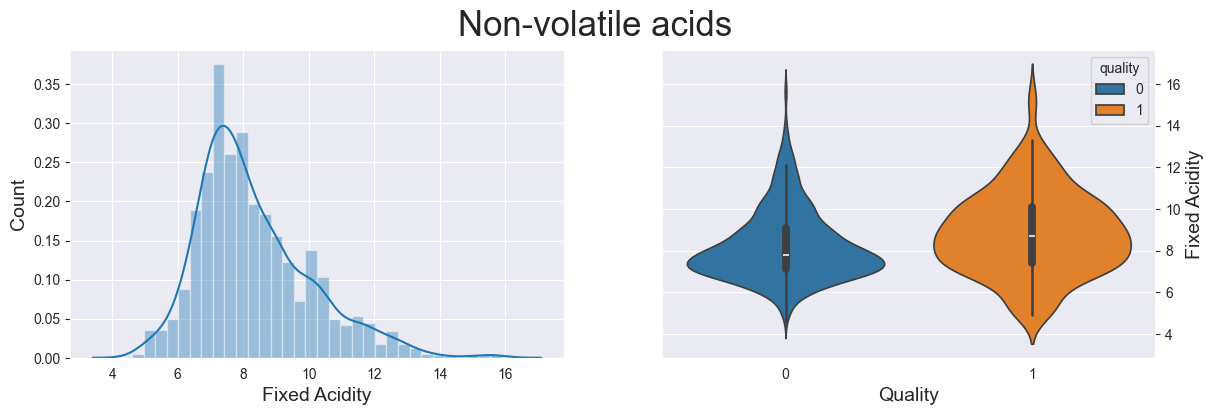

In [49]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['fixed acidity'], ax = axes[0])
axes[0].set_xlabel('Fixed Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'fixed acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Fixed Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Non-volatile acids", fontsize = 25)

plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3914890576.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['volatile acidity'], ax = axes[0])


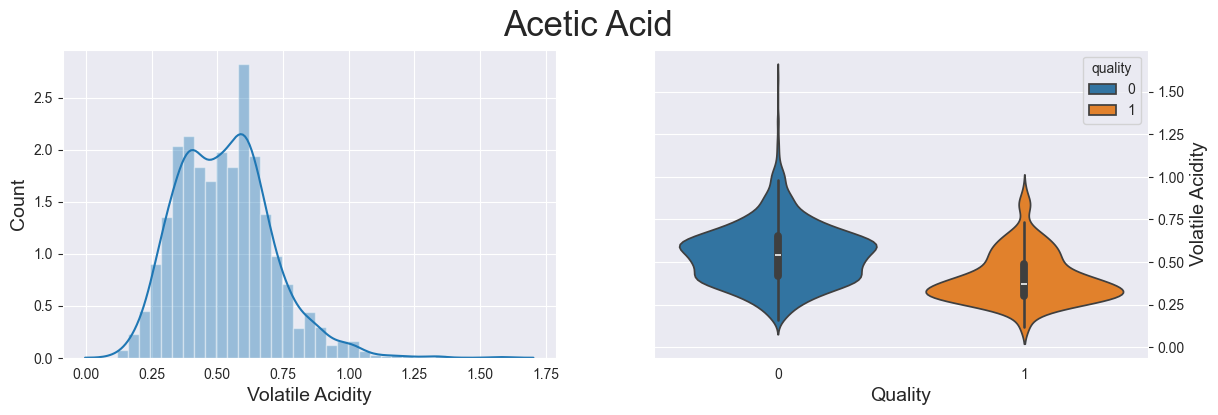

In [50]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['volatile acidity'], ax = axes[0])
axes[0].set_xlabel('Volatile Acidity', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'volatile acidity', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Volatile Acidity', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Acetic Acid", fontsize = 25)
plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\1108078800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['citric acid'], ax = axes[0])


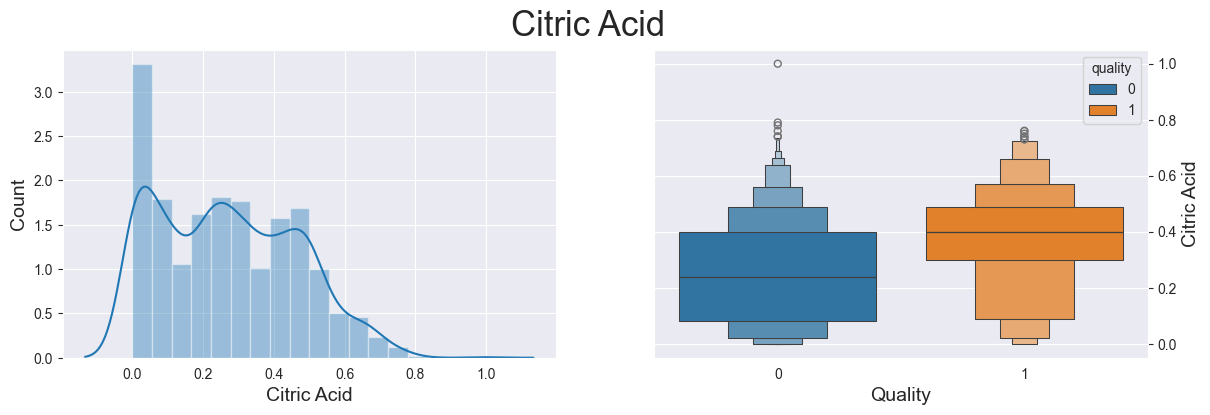

In [51]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['citric acid'], ax = axes[0])
axes[0].set_xlabel('Citric Acid', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'citric acid', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Citric Acid', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Citric Acid", fontsize = 25)
plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\1354340234.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['residual sugar'], ax = axes[0])


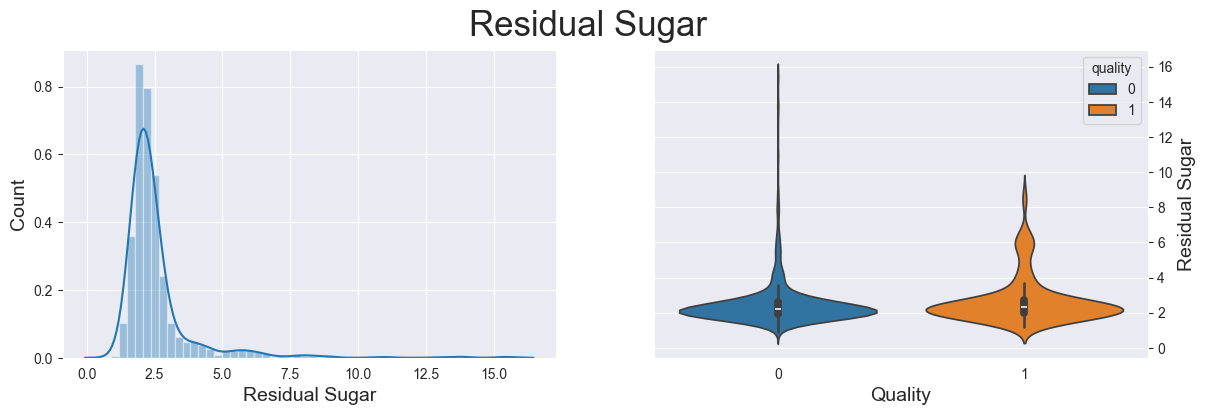

In [52]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['residual sugar'], ax = axes[0])
axes[0].set_xlabel('Residual Sugar', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'residual sugar', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Residual Sugar', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.suptitle("Residual Sugar", fontsize = 25)
plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\2634227217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['chlorides'], ax = axes[0])


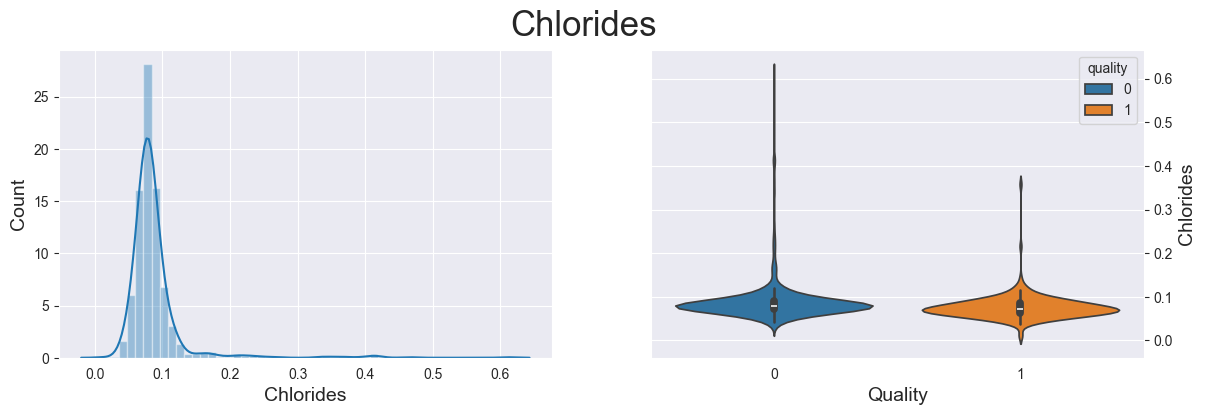

In [53]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['chlorides'], ax = axes[0])
axes[0].set_xlabel('Chlorides', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'chlorides', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Chlorides', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Chlorides", fontsize = 25)

plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\1234307490.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\1234307490.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['total sulfur

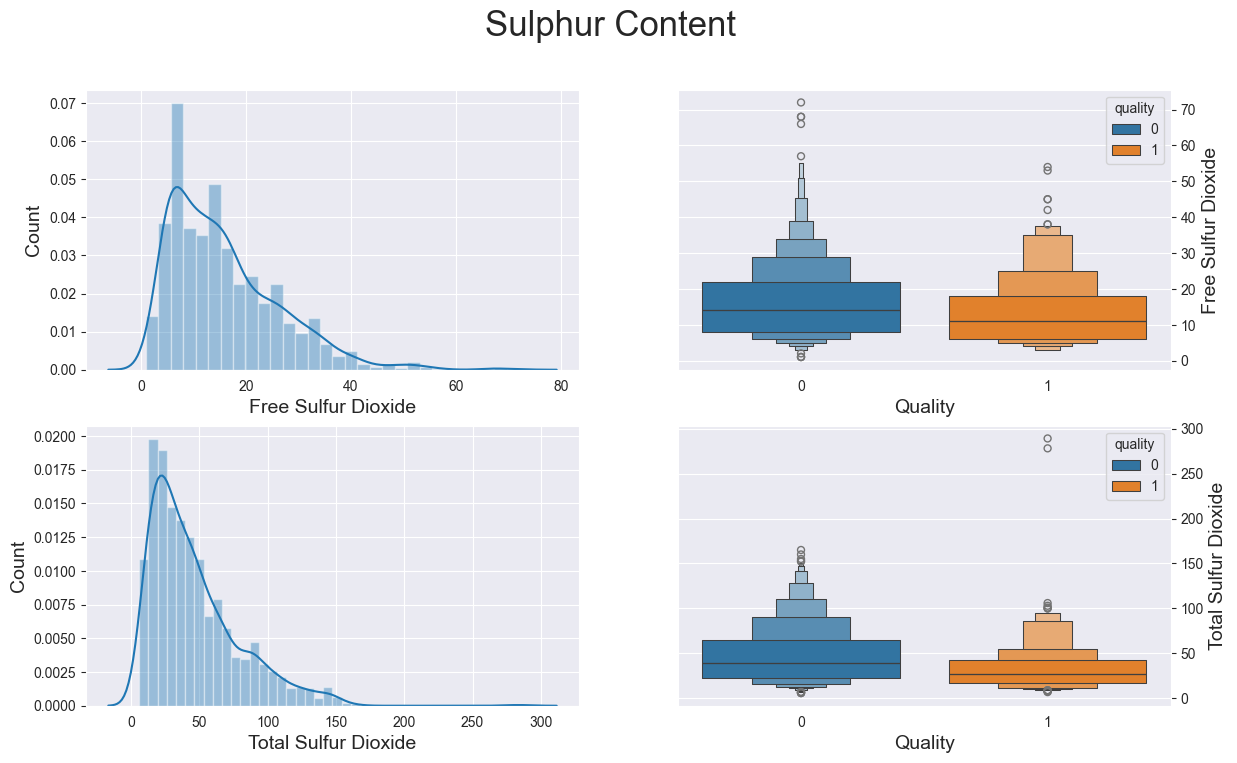

In [54]:
f, axes = plt.subplots(2,2,figsize=(14,8))

sns.distplot(dataset['free sulfur dioxide'], ax = axes[0,0])
axes[0,0].set_xlabel('Free Sulfur Dioxide', fontsize=14)
axes[0,0].set_ylabel('Count', fontsize=14)
axes[0,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'free sulfur dioxide', data = dataset, hue = 'quality',ax = axes[0,1])
axes[0,1].set_xlabel('Quality', fontsize=14)
axes[0,1].set_ylabel('Free Sulfur Dioxide', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.distplot(dataset['total sulfur dioxide'], ax = axes[1,0])
axes[1,0].set_xlabel('Total Sulfur Dioxide', fontsize=14)
axes[1,0].set_ylabel('Count', fontsize=14)
axes[1,0].yaxis.tick_left()

sns.boxenplot(x = 'quality', y = 'total sulfur dioxide', data = dataset, hue = 'quality',ax = axes[1,1])
axes[1,1].set_xlabel('Quality', fontsize=14)
axes[1,1].set_ylabel('Total Sulfur Dioxide', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.suptitle("Sulphur Content", fontsize = 25)

plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3760890137.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['density'], ax = axes[0])


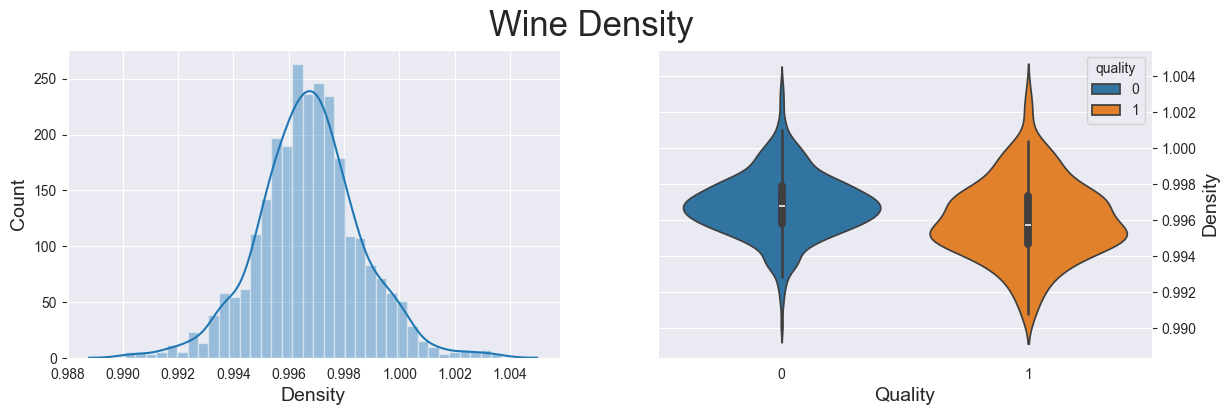

In [55]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['density'], ax = axes[0])
axes[0].set_xlabel('Density', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'density', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Density', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Wine Density", fontsize = 25)

plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3147378139.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['pH'], ax = axes[0])


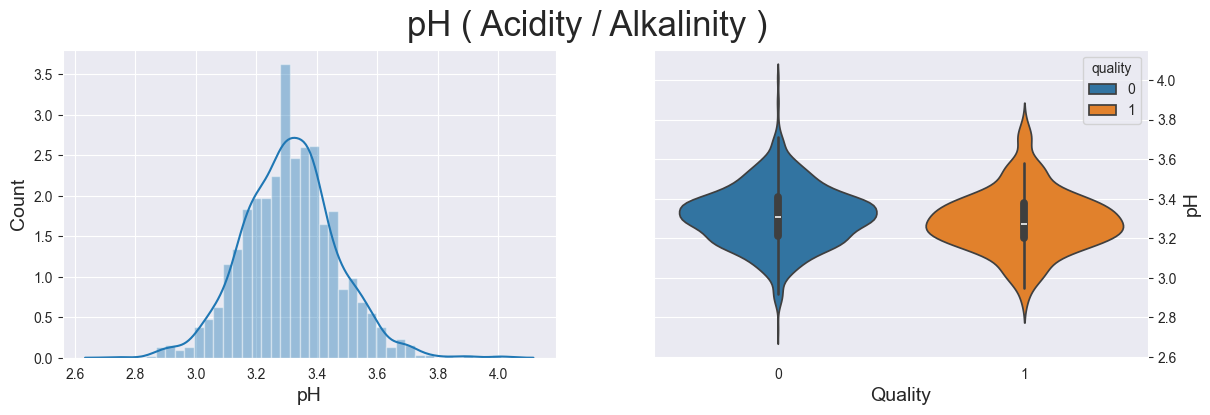

In [56]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['pH'], ax = axes[0])
axes[0].set_xlabel('pH', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'pH', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('pH', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("pH ( Acidity / Alkalinity )", fontsize = 25)

plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3934056909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['sulphates'], ax = axes[0])


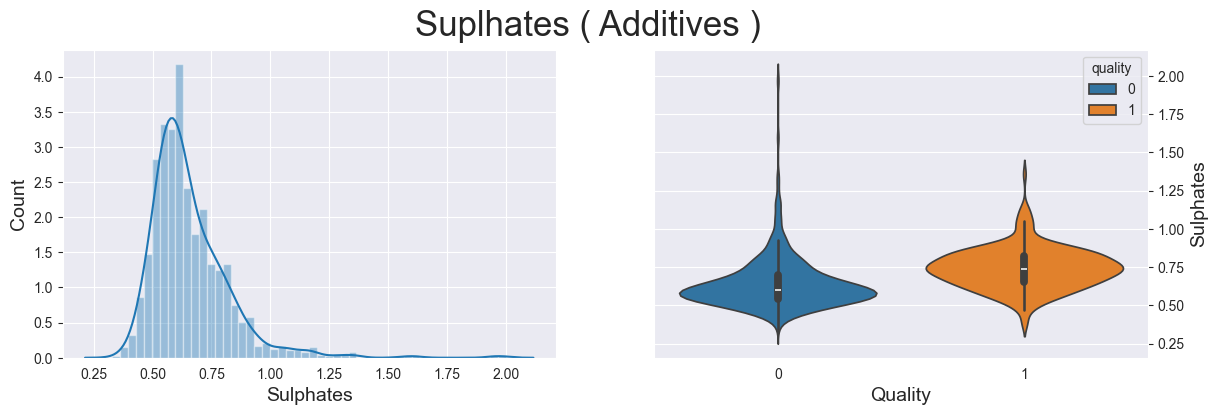

In [57]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['sulphates'], ax = axes[0])
axes[0].set_xlabel('Sulphates', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'sulphates', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Sulphates', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Suplhates ( Additives )", fontsize = 25)


plt.show()

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\85886355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['alcohol'], ax = axes[0])


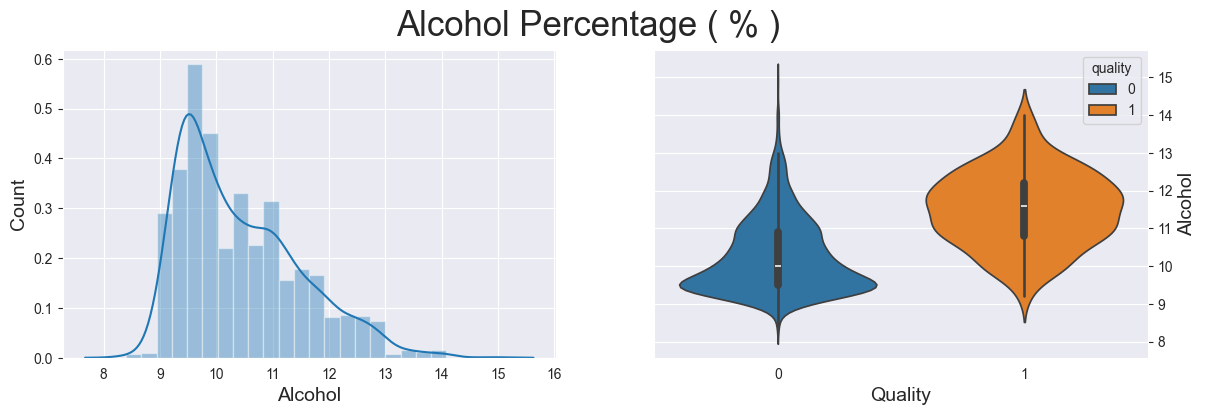

In [58]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(dataset['alcohol'], ax = axes[0])
axes[0].set_xlabel('Alcohol', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'quality', y = 'alcohol', data = dataset, hue = 'quality',ax = axes[1])
axes[1].set_xlabel('Quality', fontsize=14)
axes[1].set_ylabel('Alcohol', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.suptitle("Alcohol Percentage ( % )", fontsize = 25)

plt.show()

In [59]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [60]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1,1)

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


## <span id="4"></span> 4. Classification Models

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### <span id="5"></span> Logistic Regression

In [64]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [65]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.865625


In [66]:
cf_lr = confusion_matrix(y_test, y_pred_lr_test)

In [67]:
tp_lr = cf_lr[0,0]
fp_lr = cf_lr[0,1]
tn_lr = cf_lr[1,1]
fn_lr = cf_lr[1,0]

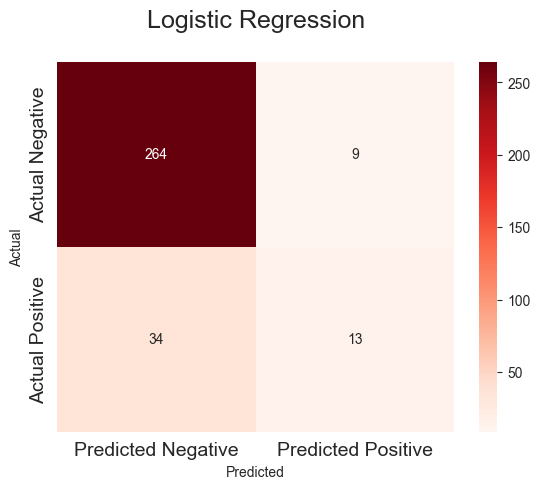

In [68]:
sns.heatmap(cf_lr, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Logistic Regression', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

### <span id="6"></span> K-Nearest Neighbors (K-NN)

In [69]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [70]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.89375


In [71]:
cf_knn = confusion_matrix(y_test, y_pred_knn_test)

In [72]:
tp_knn = cf_knn[0,0]
fp_knn = cf_knn[0,1]
tn_knn = cf_knn[1,1]
fn_knn = cf_knn[1,0]

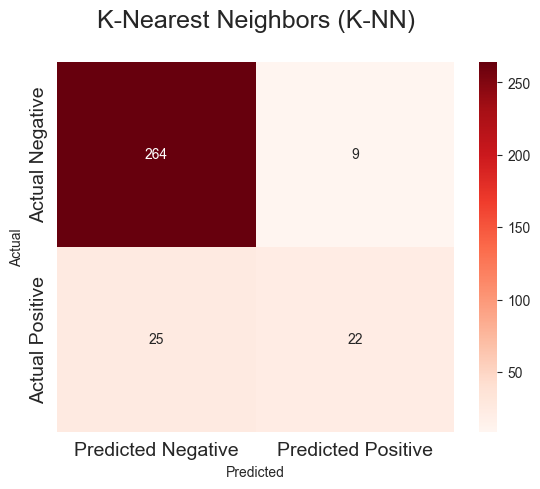

In [73]:
sns.heatmap(cf_knn, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('K-Nearest Neighbors (K-NN)', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

### <span id="7"></span> Support Vector Machine (SVM - Linear)

In [74]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(kernel='linear')

In [75]:
# Predicting Cross Validation Score
cv_svm_linear = cross_val_score(estimator = classifier_svm_linear, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_linear.mean())

y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

CV:  0.8670829232283465
Training set:  0.8670836591086787
Test set:  0.853125


In [76]:
cf_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)

In [77]:
tp_svm_linear = cf_svm_linear[0,0]
fp_svm_linear = cf_svm_linear[0,1]
tn_svm_linear = cf_svm_linear[1,1]
fn_svm_linear = cf_svm_linear[1,0]

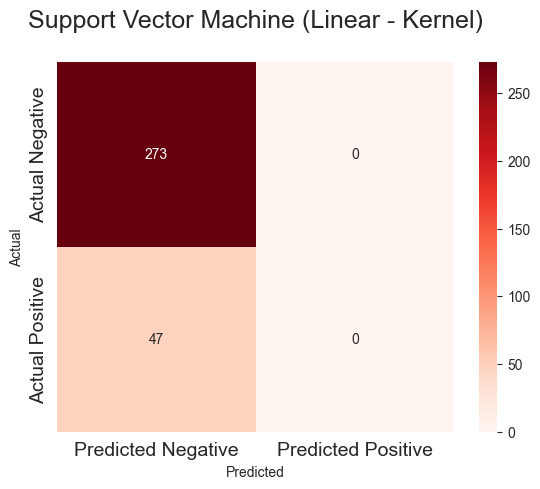

In [78]:
sns.heatmap(cf_svm_linear, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Support Vector Machine (Linear - Kernel)', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

### <span id="8"></span> Support Vector Machine (RBF - Kernel)

In [79]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001, gamma = 'scale')
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())

SVC(C=10)

In [80]:
# Predicting Cross Validation Score
cv_svm_kernel = cross_val_score(estimator = classifier_svm_kernel, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_svm_kernel.mean())

y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

CV:  0.8999261811023622
Training set:  0.9421422986708365
Test set:  0.89375


In [81]:
cf_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)

In [82]:
tp_svm_kernel = cf_svm_kernel[0,0]
fp_svm_kernel = cf_svm_kernel[0,1]
tn_svm_kernel = cf_svm_kernel[1,1]
fn_svm_kernel = cf_svm_kernel[1,0]

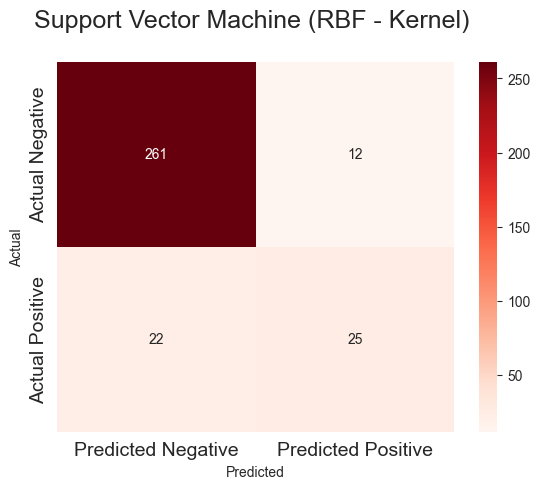

In [83]:
sns.heatmap(cf_svm_kernel, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Support Vector Machine (RBF - Kernel) ', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

### <span id="9"></span> Naive Bayes

In [84]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [85]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8373462106299213
Training set:  0.8389366692728695
Test set:  0.846875


In [86]:
cf_nb = confusion_matrix(y_test, y_pred_nb_test)

In [87]:
tp_nb = cf_nb[0,0]
fp_nb = cf_nb[0,1]
tn_nb = cf_nb[1,1]
fn_nb = cf_nb[1,0]

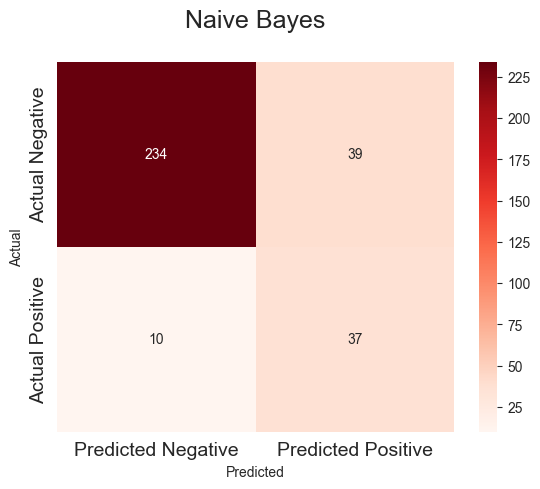

In [88]:
sns.heatmap(cf_nb, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Naive Bayes', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

### <span id="10"></span> Decision Tree Classification

In [89]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [90]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8967827263779528
Training set:  1.0
Test set:  0.878125


In [91]:
cf_dt = confusion_matrix(y_test, y_pred_dt_test)

In [92]:
tp_dt = cf_dt[0,0]
fp_dt = cf_dt[0,1]
tn_dt = cf_dt[1,1]
fn_dt = cf_dt[1,0]

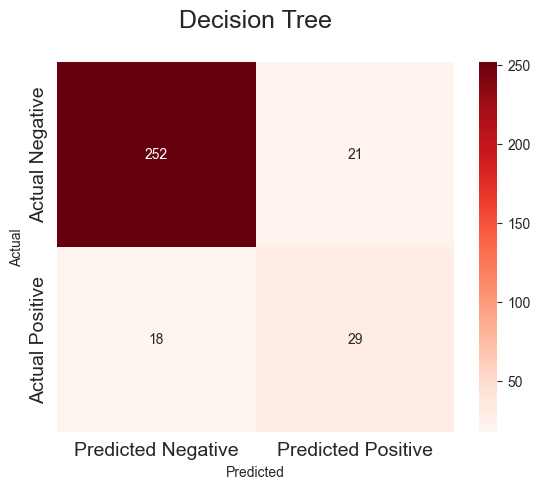

In [93]:
sns.heatmap(cf_dt, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Decision Tree', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()


### <span id="11"></span> Random Forest Classification

In [94]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [95]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9140194389763779
Training set:  1.0
Test set:  0.9125


In [96]:
cf_rf = confusion_matrix(y_test, y_pred_rf_test)

In [97]:
tp_rf = cf_rf[0,0]
fp_rf = cf_rf[0,1]
tn_rf = cf_rf[1,1]
fn_rf = cf_rf[1,0]

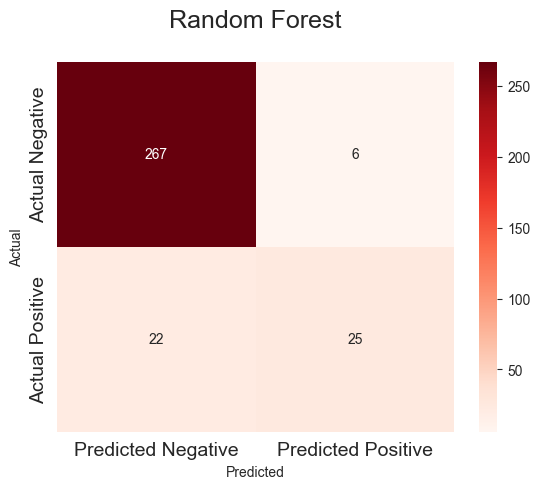

In [98]:
sns.heatmap(cf_rf, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Random Forest', fontsize=18, pad=25)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

## <span id="12"></span> 5. Model Performance

In [99]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test, cv_svm_linear.mean()),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test, cv_svm_kernel.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [100]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])

predict["Precision"] = predict["True Positive"] / (predict["True Positive"] + predict["False Positive"])
predict["Recall"] = predict["True Positive"] / (predict["True Positive"] + predict["False Negative"])
predict["F1 Score"] = 2 * (predict["Precision"] * predict["Recall"]) / (predict["Precision"] + predict["Recall"])
predict["Specificity"] = predict["True Negative"] / (predict["True Negative"] + predict["False Positive"])


predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation,Precision,Recall,F1 Score,Specificity
0,Logistic Regression,264,9,13,34,0.885848,0.865625,0.885858,0.967033,0.885906,0.924694,0.590909
1,K-Nearest Neighbors (KNN),264,9,22,25,1.000000,0.893750,0.902270,0.967033,0.913495,0.939502,0.709677
2,SVM (Linear),273,0,0,47,0.867084,0.853125,0.867083,1.000000,0.853125,0.920742,NaN
3,SVM (Kernel),261,12,25,22,0.942142,0.893750,0.899926,0.956044,0.922261,0.938849,0.675676
4,Naive Bayes,234,39,37,10,0.838937,0.846875,0.837346,0.857143,0.959016,0.905222,0.486842
5,Decision Tree Classification,252,21,29,18,1.000000,0.878125,0.896783,0.923077,0.933333,0.928177,0.580000
6,Random Forest Tree Classification,267,6,25,22,1.000000,0.912500,0.914019,0.978022,0.923875,0.950178,0.806452


### <span id = "13"></span> 5.1 Confusion Matrix

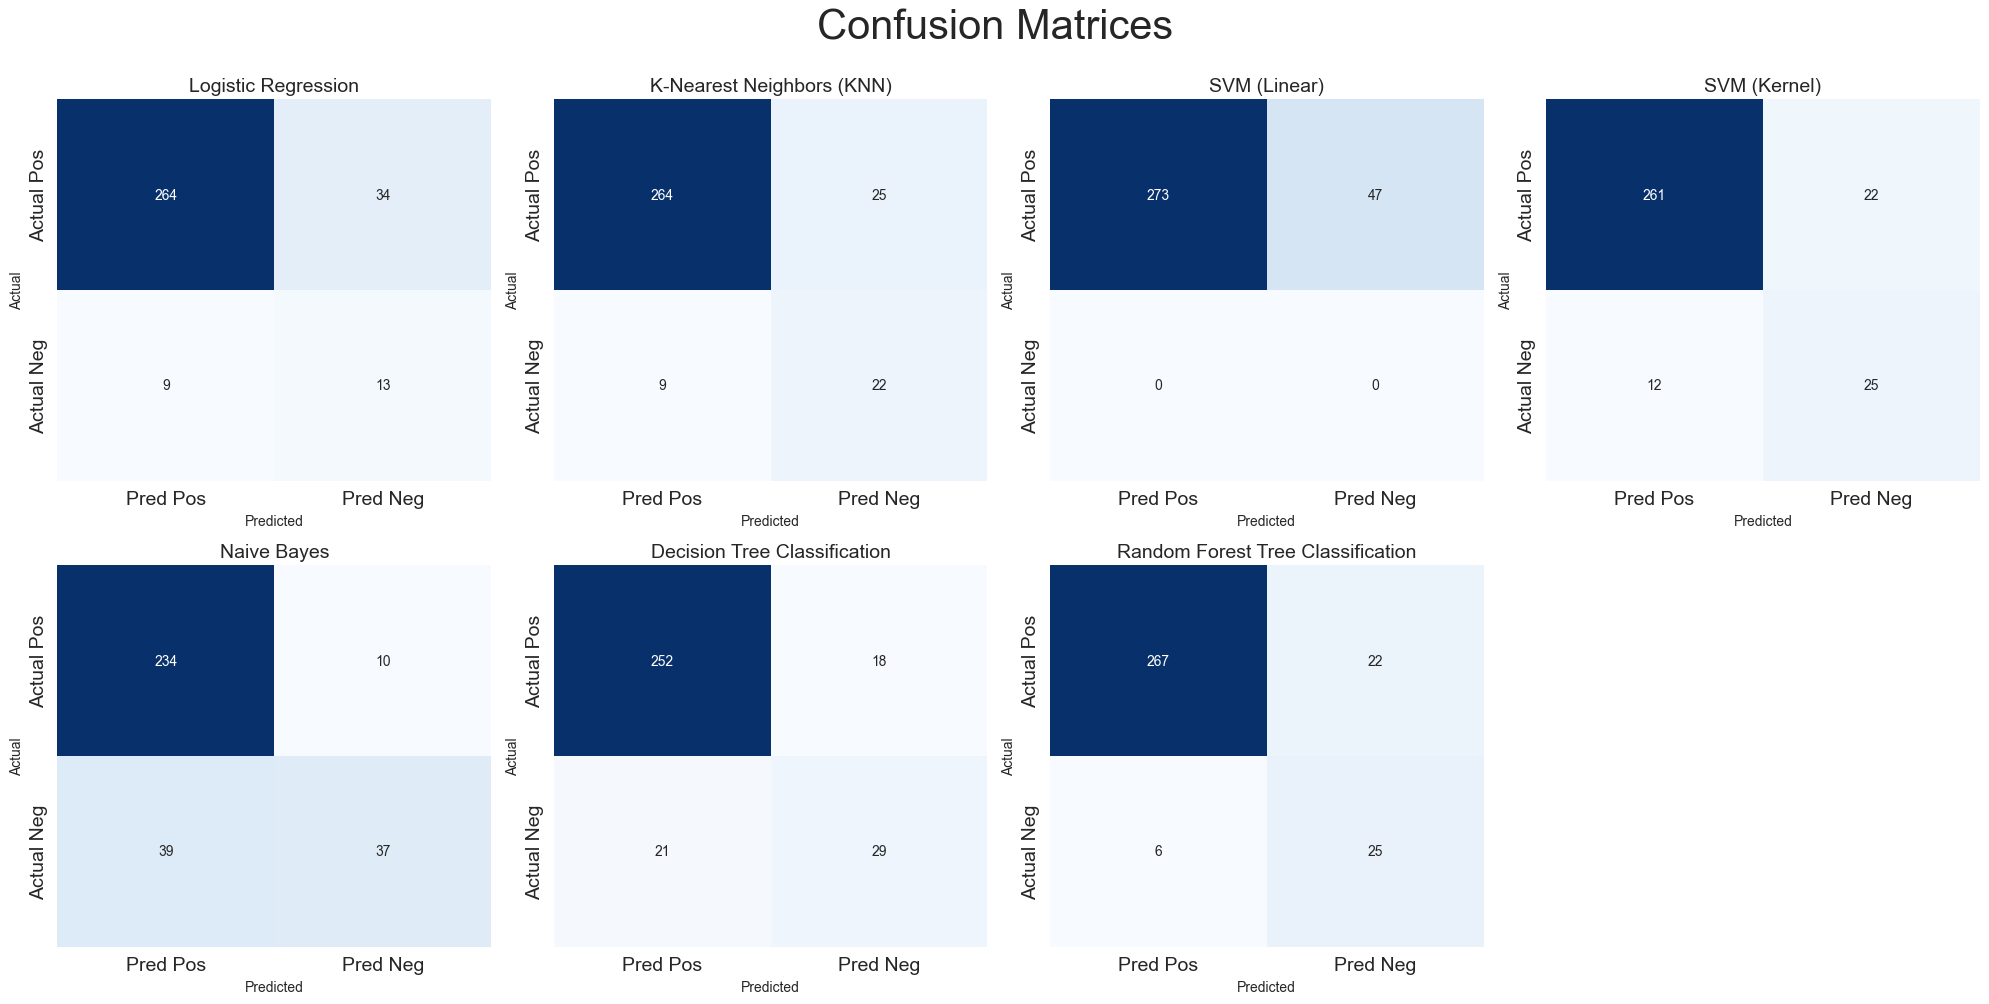

In [101]:

n_models = len(models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for idx, model_data in enumerate(models):
    model_name = model_data[0]
    TP = model_data[1]
    FP = model_data[2]
    TN = model_data[3]
    FN = model_data[4]

    cm = np.array([[TP, FN],
                   [FP, TN]])

    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax,
                xticklabels=["Pred Pos", "Pred Neg"],
                yticklabels=["Actual Pos", "Actual Neg"],)
    
    ax.tick_params(axis='x', labelsize=14)  
    ax.tick_params(axis='y', labelsize=14)

    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Confusion Matrices', fontsize=30, y=1)
plt.tight_layout()
# fig.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

### <span id="14"></span> 5.2 Cross-Validation Score

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\2311662096.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


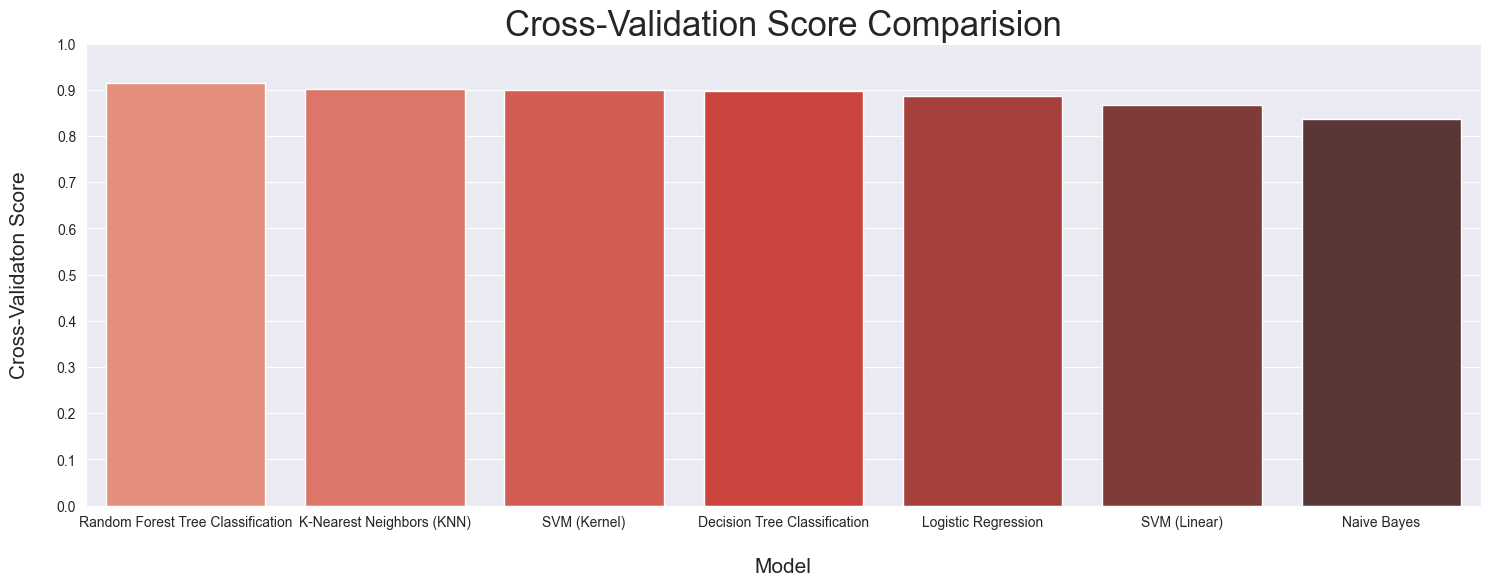

In [102]:
f, axe = plt.subplots(1,1, figsize=(18,6))


predict.sort_values(by='Cross-Validation', ascending=False, inplace=True)


sns.barplot(
    x='Model',
    y='Cross-Validation',
    data=predict,
    palette="Reds_d",
    ax=axe
)


axe.set_ylabel('Cross-Validaton Score', size=15,labelpad=20)
axe.set_xlabel('Model', size = 15,labelpad=20)
axe.set_ylim(0,1.0)
axe.set_yticks(np.arange(0, 1.1, 0.1))
plt.title("Cross-Validation Score Comparision", fontsize=25)
plt.show()

### <span id="15"></span>5.3 Accuracy Score

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3626492663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3626492663.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1],)


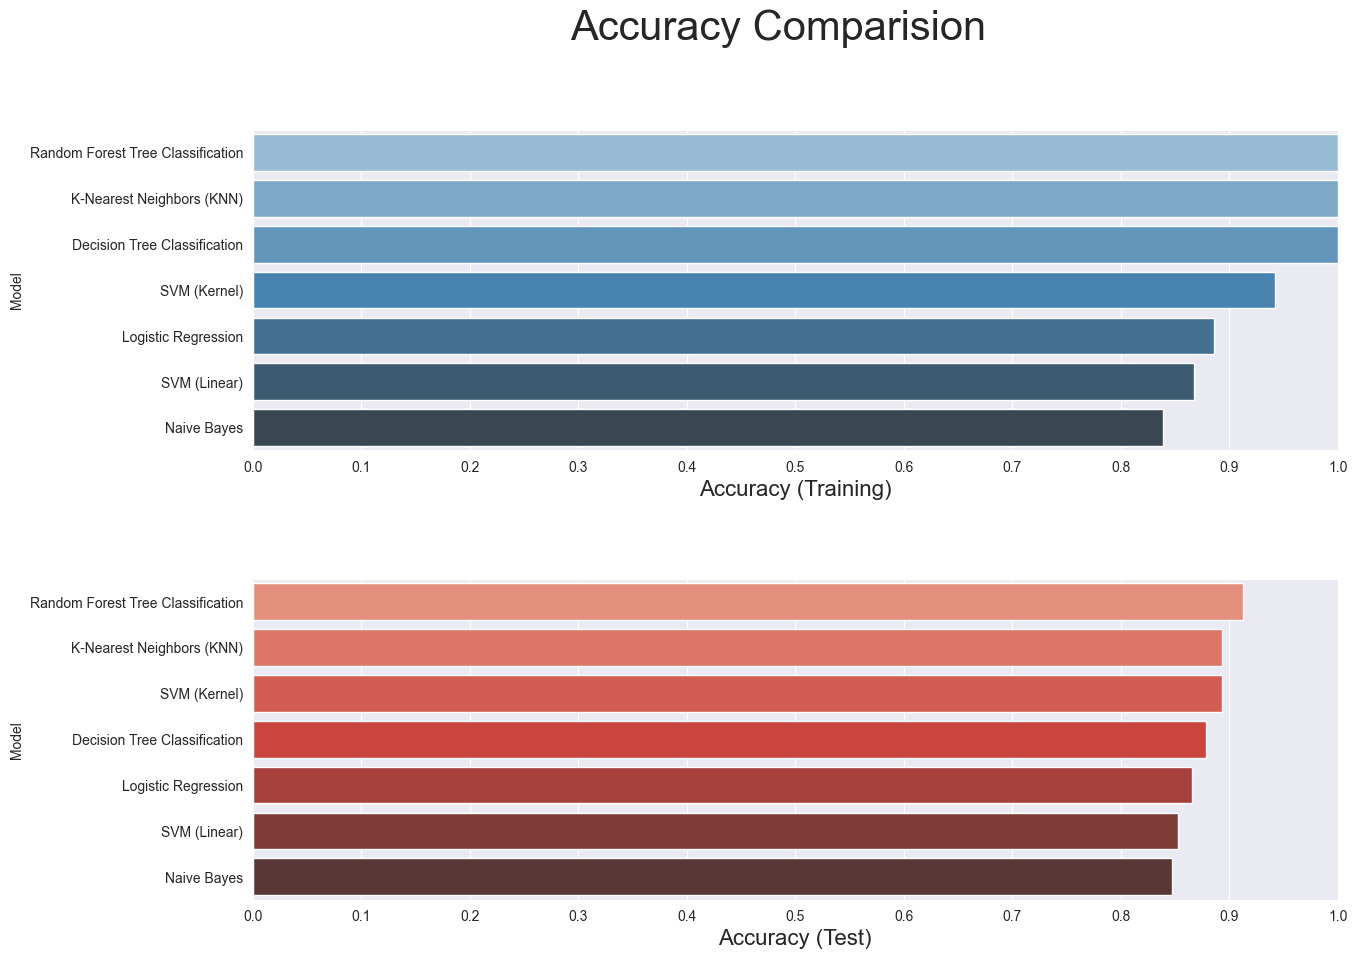

In [103]:

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1],)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.subplots_adjust(hspace=0.4)
plt.suptitle('Accuracy Comparision', fontsize=30, y=1)


plt.show()

### <span id = "16"></span> 5.4 Precision Score

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\4265484505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


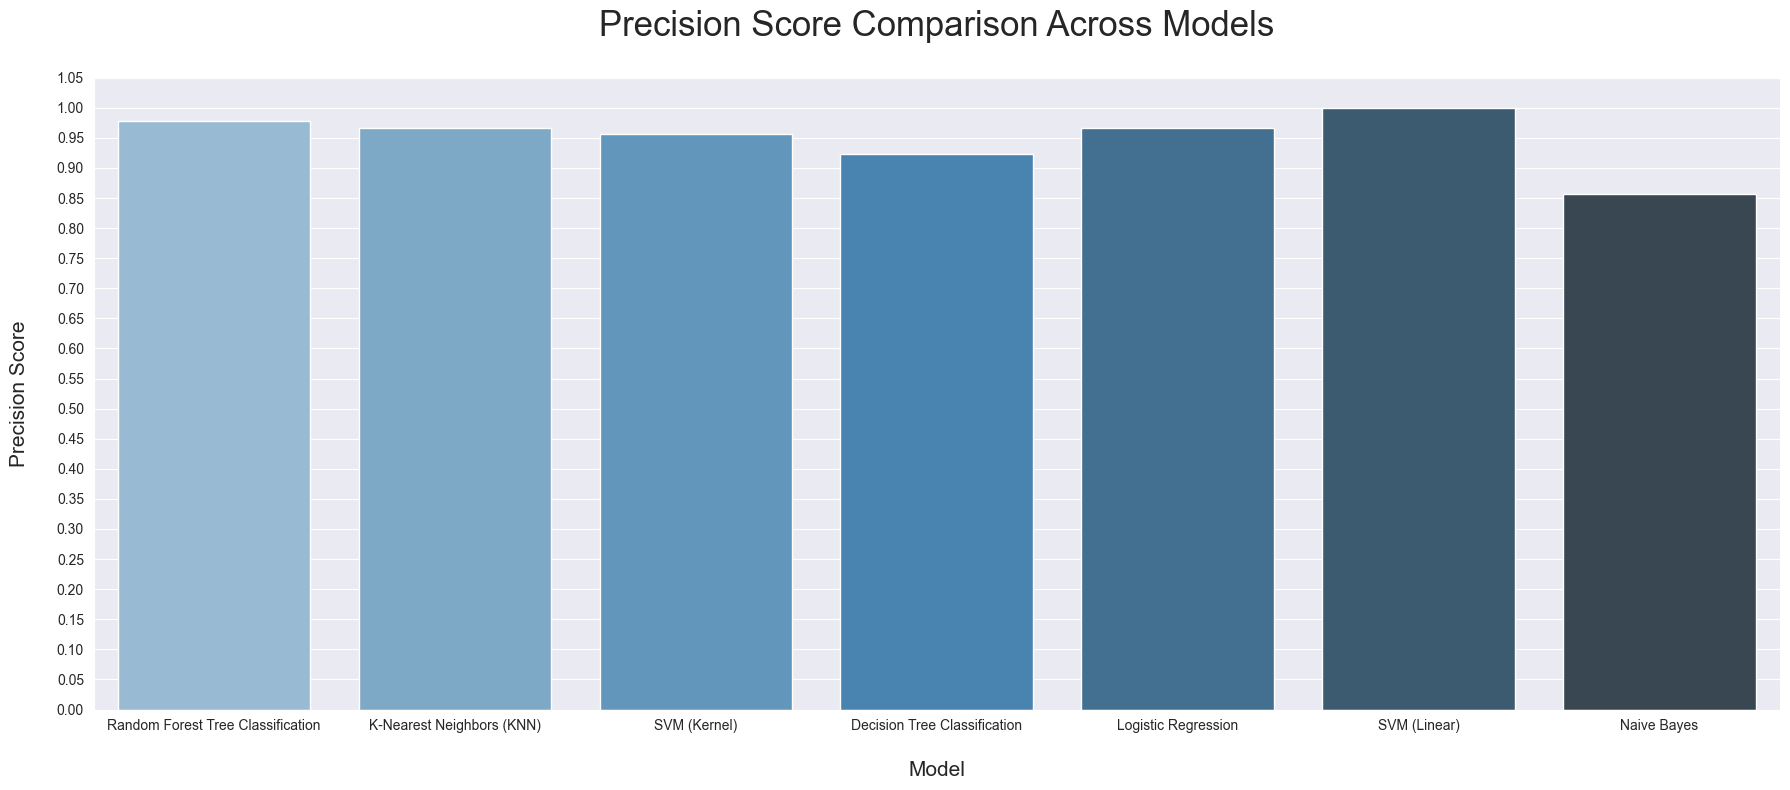

In [104]:
plt.figure(figsize=(18, 8))

sns.barplot(
    x='Model',
    y='Precision',
    data=predict,
    palette="Blues_d"
)

plt.ylabel('Precision Score', size=15, labelpad=20)
plt.xlabel('Model', size=15, labelpad=20)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.05))
plt.title('Precision Score Comparison Across Models', fontsize=25, pad=30)


plt.tight_layout()
plt.show()


### <span id="17"> </span> 5.5 False Observation

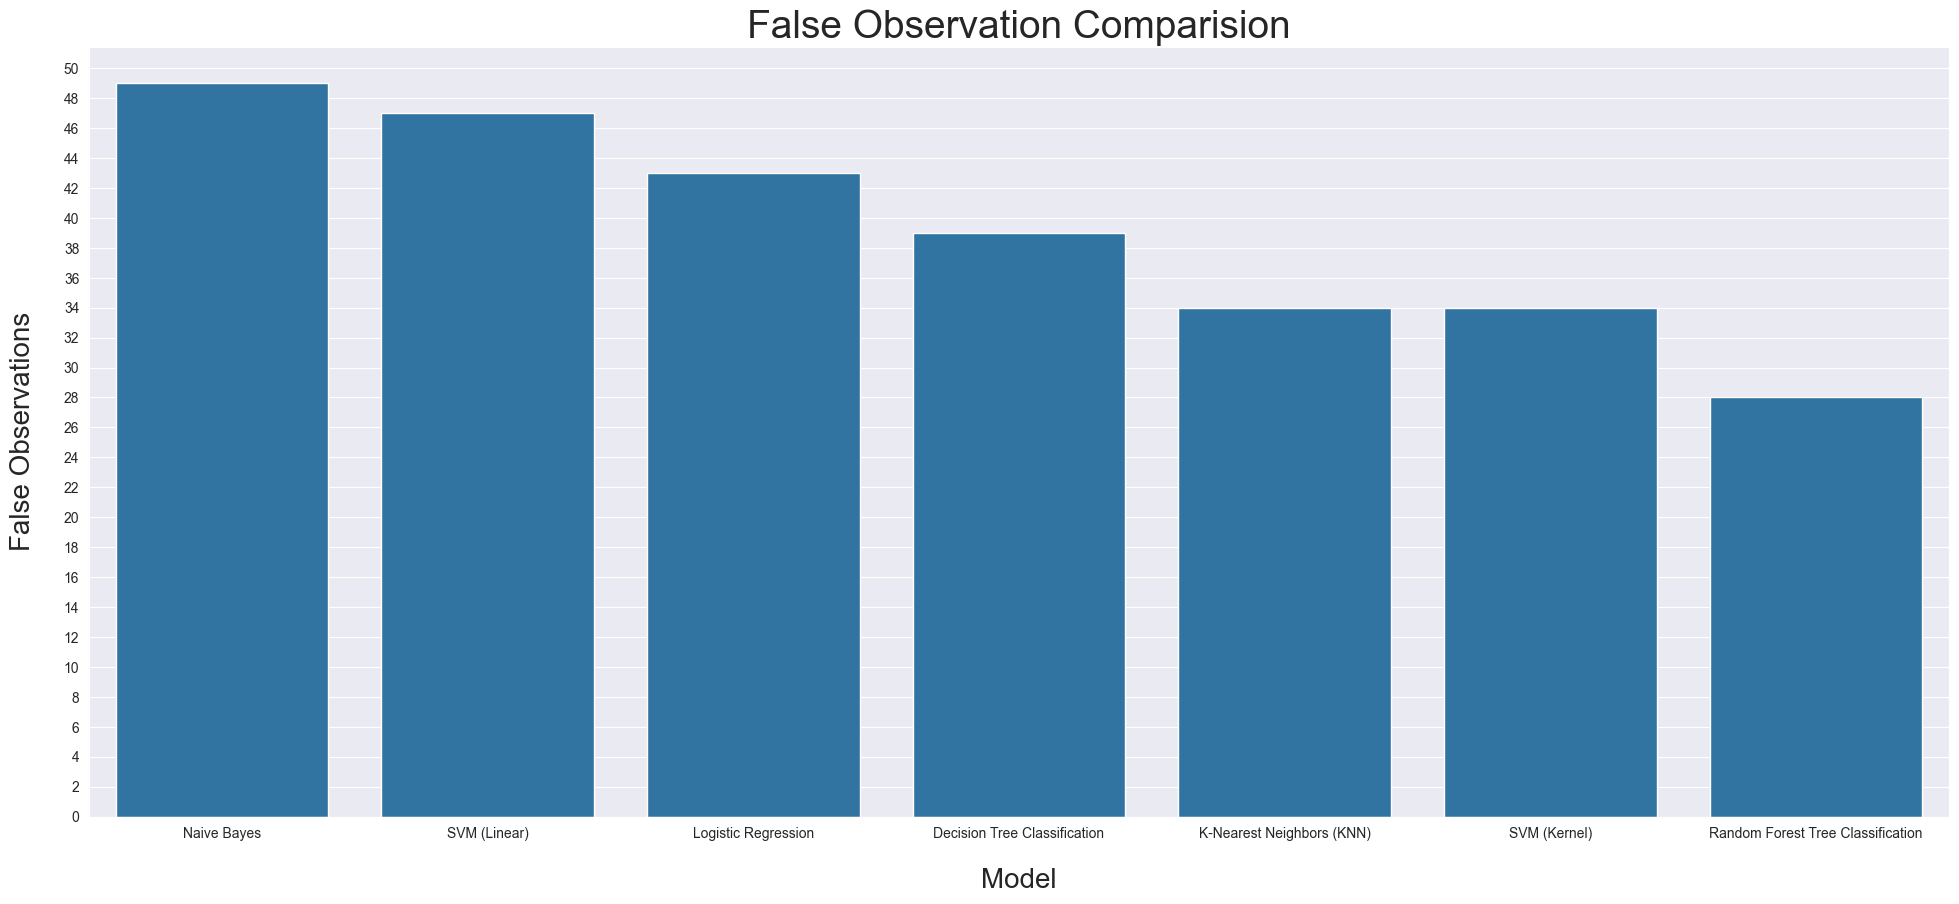

In [105]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,10))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20,labelpad=20)
axe.set_ylabel('False Observations', size=20,labelpad=20)

axe.set_yticks(np.arange(0, 51, 2))
plt.title("False Observation Comparision", fontsize = 28)

plt.show()

### <span id="18"></span> 5.6 Recall

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\3992836373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


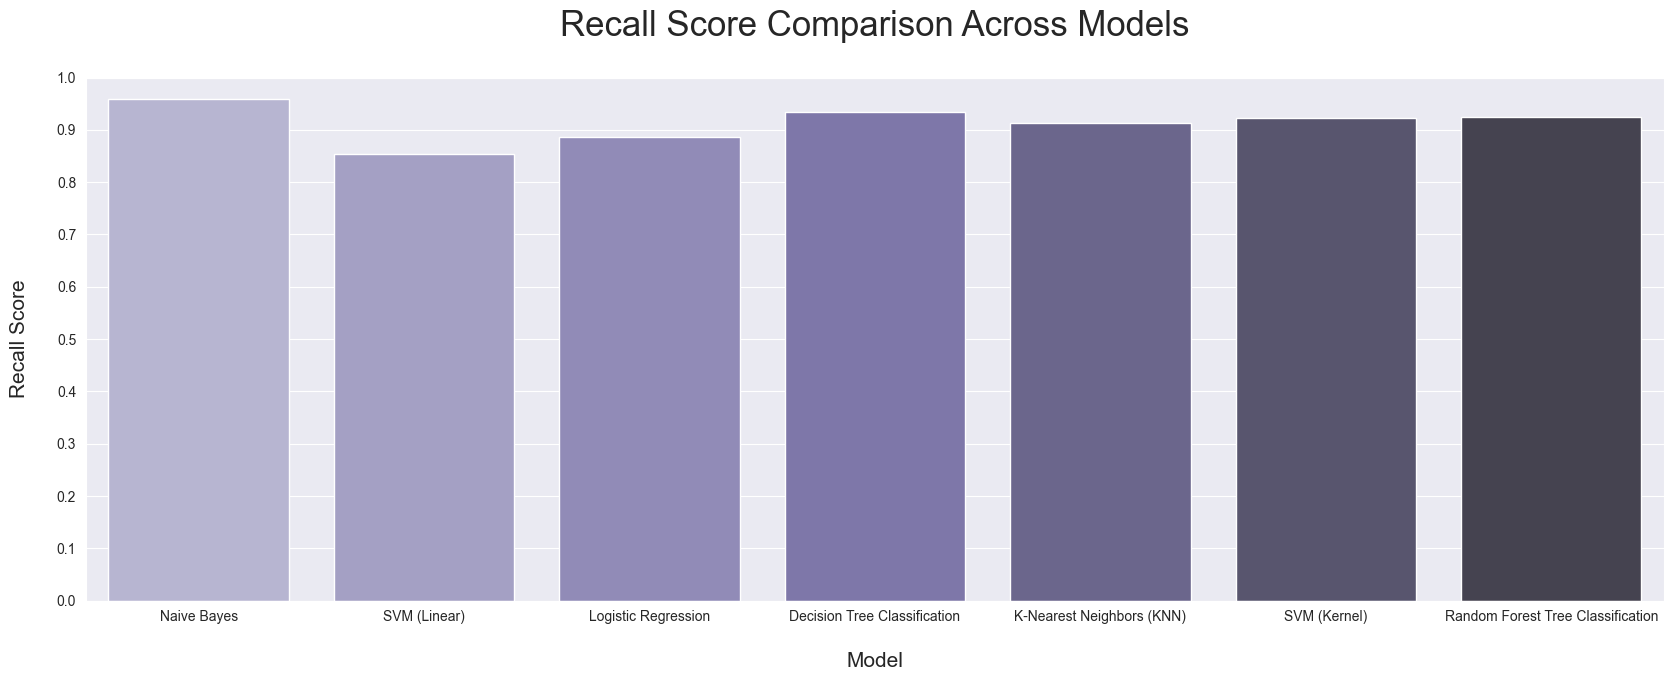

In [106]:
plt.figure(figsize=(18, 8))

sns.barplot(
    x='Model',
    y='Recall',
    data=predict,
    palette= "Purples_d"
)

plt.ylabel('Recall Score', size=15, labelpad=20)
plt.xlabel('Model', size=15, labelpad=20)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Recall Score Comparison Across Models', fontsize=25, pad=30)

plt.tight_layout(pad=5)
plt.show()


### <span id = "19"> </span> 5.7 F1 Score

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\2202857389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


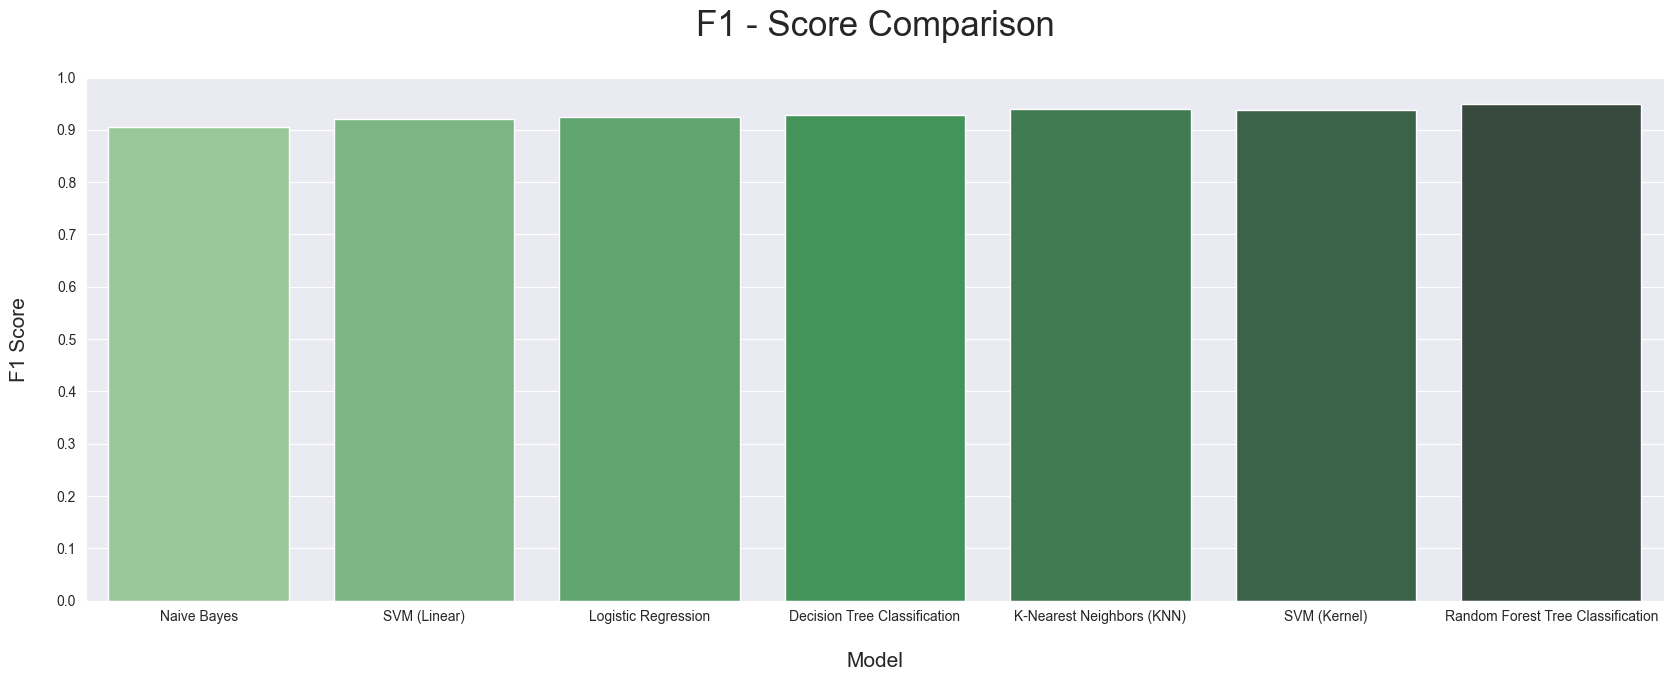

In [115]:
plt.figure(figsize=(18, 8))

sns.barplot(
    x='Model',
    y='F1 Score',
    data=predict,
    palette= "Greens_d"
)

plt.ylabel('F1 Score', size=15, labelpad=20)
plt.xlabel('Model', size=15, labelpad=20)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('F1 - Score Comparison', fontsize=25, pad=30)

plt.tight_layout(pad=5)
plt.show()


### <span id="20"> </span> 5.8 Specificity

C:\Users\nipun\AppData\Local\Temp\ipykernel_36668\2030974929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


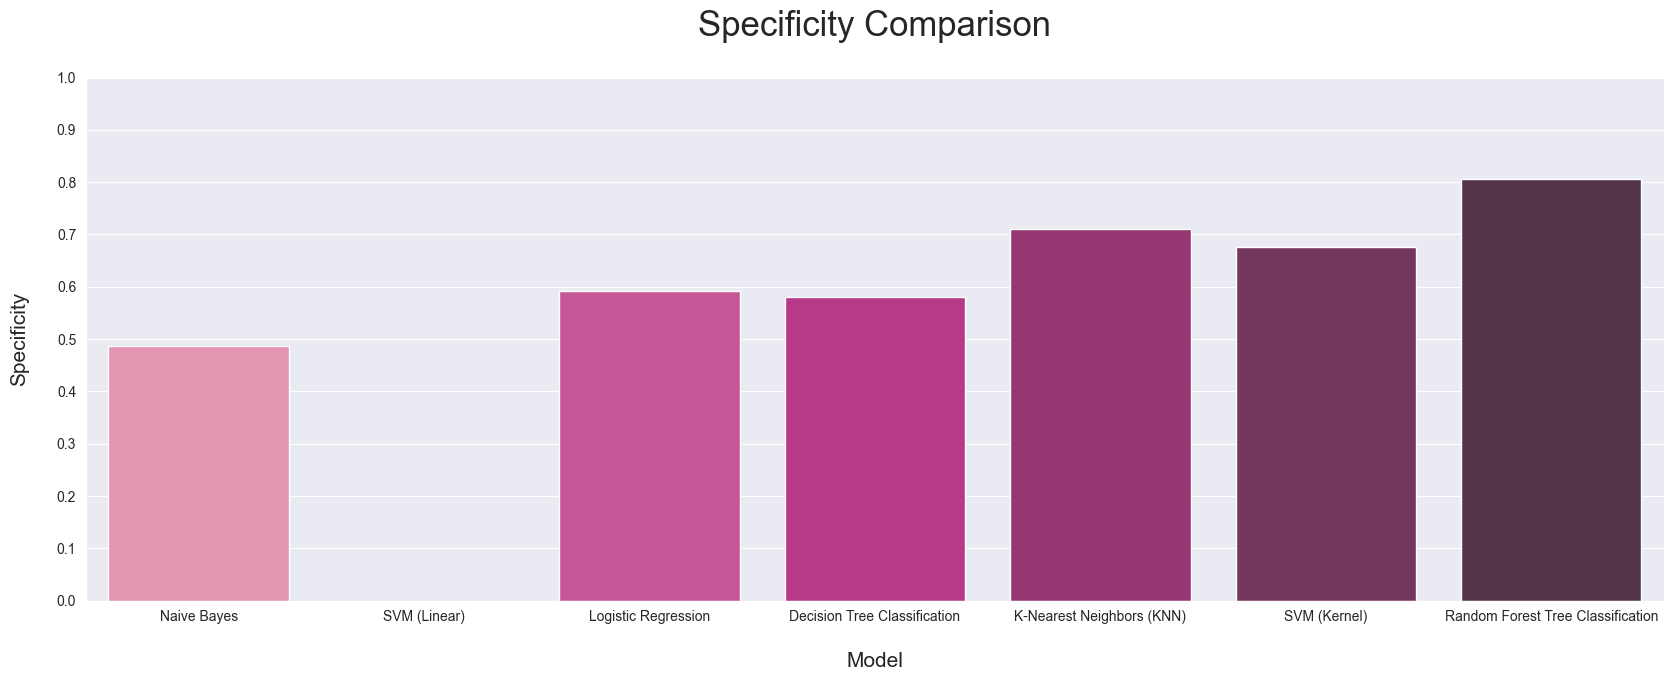

In [134]:
plt.figure(figsize=(18, 8))

sns.barplot(
    x='Model',
    y='Specificity',
    data=predict,
    palette= "RdPu_d"
)

plt.ylabel('Specificity', size=15, labelpad=20)
plt.xlabel('Model', size=15, labelpad=20)
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Specificity Comparison', fontsize=25, pad=30)

plt.tight_layout(pad=5)
plt.show()


## <span id="21"></span> 6. Conclusion

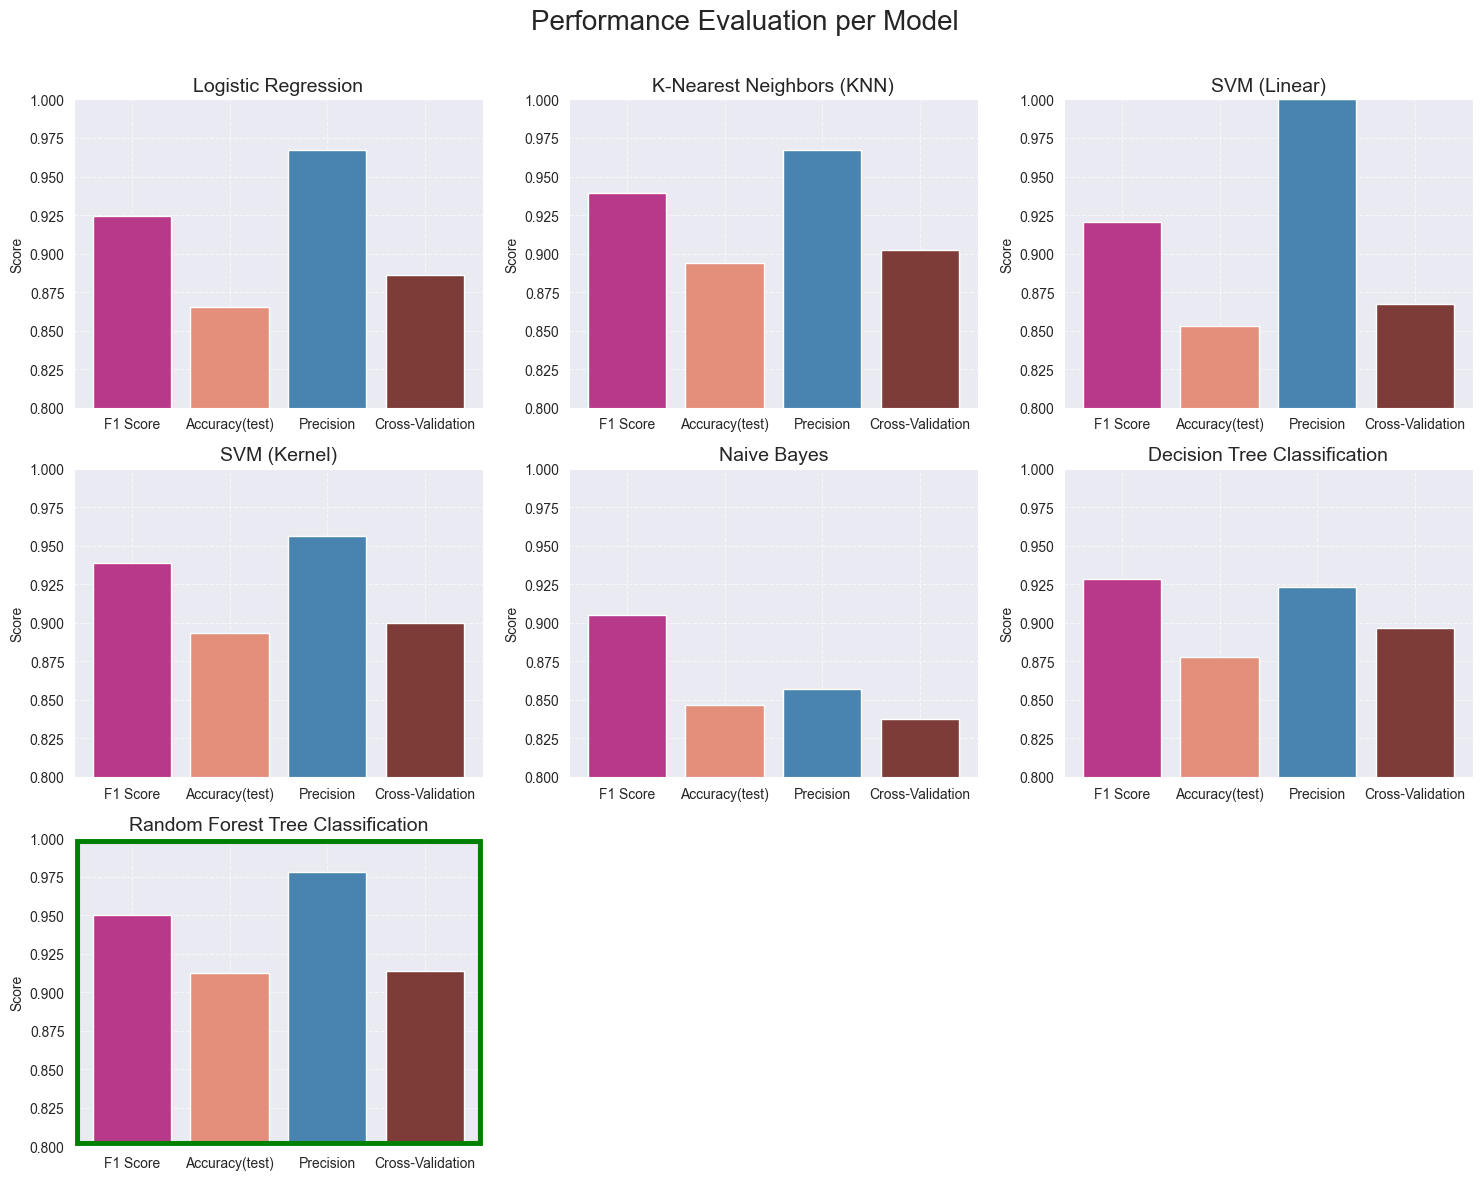

In [146]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()


best_index = predict[['F1 Score', 'Accuracy(test)']].mean(axis=1).idxmax()


for i, row in predict.iterrows():
    ax = axes[i]
    metrics = ['F1 Score', 'Accuracy(test)','Precision','Cross-Validation']
    values = [row['F1 Score'], row['Accuracy(test)'],row['Precision'],row['Cross-Validation']]

    ax.bar(metrics, values, color=['#b83889' ,'#e48f7c','#4884af','#7e3c39' ])
    ax.set_ylim(0.8, 1.0)
    ax.set_title(row['Model'], fontsize=14)
    ax.set_ylabel("Score")
    ax.grid(True, linestyle='--', alpha=0.6)

    if i == best_index:
        rect = patches.Rectangle(
            (0, 0), 1, 1, transform=ax.transAxes,
            linewidth=8, edgecolor='green', facecolor='none'
        )
        ax.add_patch(rect)

for j in range(len(predict), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Performance Evaluation per Model", fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


#### Algorithm Performance Overview

* **Best Overall Performer**: ✅ **Random Forest** achieves the highest **test accuracy (91.25%)**, **F1 Score (0.95)**, **precision (0.978)**, and **specificity (0.8065)**, making it the most balanced and robust classifier in this context.

* **K-Nearest Neighbors** and **SVM (Kernel)** also perform well, with high recall and F1 scores, but slightly lower specificity compared to Random Forest.

* **Naive Bayes** has the **highest recall (0.959)**, indicating it rarely misses true positives, but its **low specificity (0.4868)** suggests it often misclassifies negatives as positives, making it risky for precision-critical applications.

* **Logistic Regression** has high precision but poor specificity, suggesting it is conservative in predicting positives but may misclassify negatives.

* **SVM (Linear)** shows perfect precision (1.0) but the lowest specificity (0.0), likely due to imbalance in TN/FP predictions — it didn't classify any negatives correctly in this case.

* **Decision Tree** is close to Random Forest in precision and recall but slightly lags in specificity and overall accuracy.

#### Conclusion

If we prioritize **balanced performance across all metrics**, **Random Forest Classification** is the optimal choice:

* 🥇 **Best test accuracy (91.25%)**
* 💯 **Top F1 Score (0.9502)** for harmonic balance between precision and recall
* 🔍 **Highest specificity (0.8065)** indicating fewer false positives
* 🔄 **Excellent cross-validation consistency (0.914)** demonstrating strong generalization and reliability 

#### 🚀 Recommendation:

* **Use Random Forest** for production if computational cost and training time are acceptable.
* For faster models or interpretable baselines, **Logistic Regression** or **KNN** may be considered with slight trade-offs.